# Evolution du nombre de voitures dans la journée

## Fetching data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data_case_storage='C://Users//Utilisateur//Documents//OW data case//stored_data_case.h5'

def list_HDF_file(file_name):
     with pd.HDFStore(file_name, complevel=9, complib='blosc') as store:
             result = store.keys()   
     return result

print(list_HDF_file(data_case_storage))

def read_HDF_file(file_name, table):
    with pd.HDFStore(file_name, complevel=9, complib='blosc') as store:
         return store[table]
        
df=read_HDF_file(data_case_storage,"/transaction_and_locations")
pc=read_HDF_file(data_case_storage,"/parking_counts")
pz=read_HDF_file(data_case_storage,"/parkmeters_zones_12_12")


['/parking_counts', '/parkmeters_zones_12_12', '/transaction_and_locations']


In [3]:
max_places=pc.groupby(['parkmeter'])['count'].max()

In [5]:
max_places=max_places.to_frame()

In [6]:
max_places.head()

count
parkmeter       
20301        283
40102        303
40202        264
40401        425
40405        774

In [13]:
nb_places = max_places['count'].sum()
nb_parkmeter = len(max_places)

In [16]:
avg_places = nb_places/nb_parkmeter

In [17]:
avg_places

320.30685458039716

In [3]:
pc_time=pc.groupby(['weekday', 'hour', 'minute'])['count'].mean()

In [4]:
pc_time=pc_time.to_frame()

In [5]:
pc_time=pc_time.reset_index()

In [6]:
pc_time.head()

weekday  hour  minute       count
0  Friday     9       0  278.552594
1  Friday     9       5  222.345676
2  Friday     9      10  223.882383
3  Friday     9      15  225.585906
4  Friday     9      20  227.450609

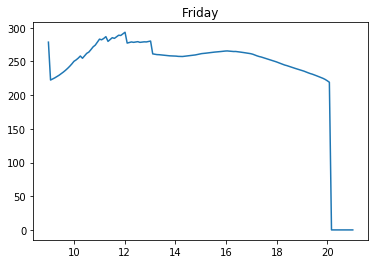

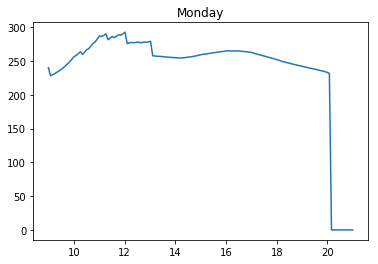

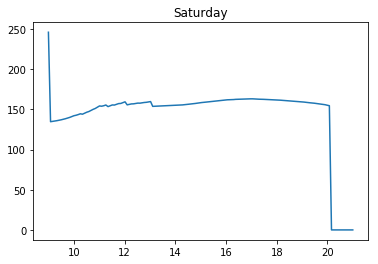

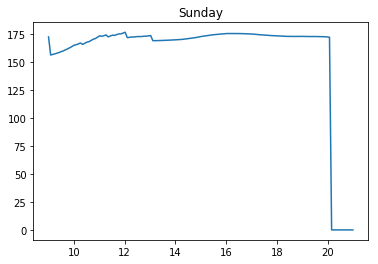

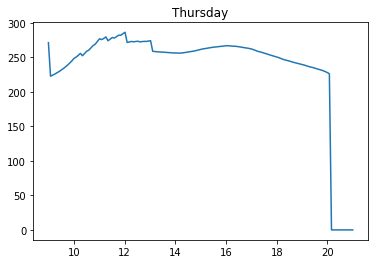

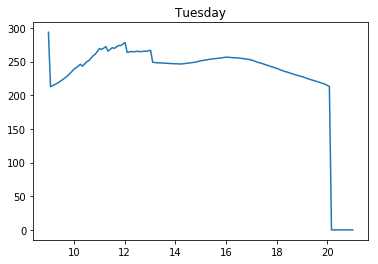

In [7]:
previous_day = 'Noday'

x_axis = np.linspace(9,21, num=12*12)
l=[]

for i in range(len(pc_time)):
    
    current_day = pc_time.iloc[i]['weekday']
    
    if ((current_day != previous_day) and (l!=[])) :
        plt.plot(x_axis, l, label = previous_day)
        plt.title(previous_day)
        plt.show()
        
        l=[]
        
    previous_day = current_day
        
    l.append(pc_time.iloc[i]['count'])
    
    